# SIMULACIÓN | LABORATORIO 3



### CONTENIDOS
1. Histogramas y Distribución empírica
2. Estimadores de máxima verosimilitud
3. Test de bondad de ajuste 

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
import ipywidgets as widgets
from IPython.core.pylabtools import figsize
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
datos = stats.binom.rvs(10,0.5,size=1000)

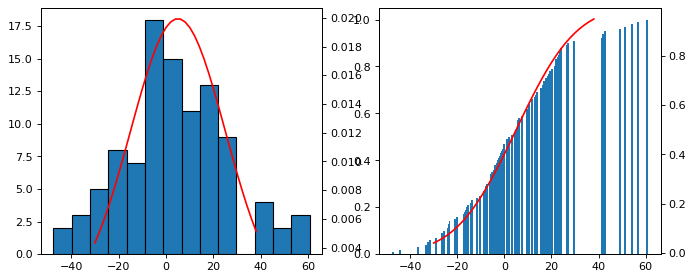

In [53]:
## Simularemos datos de una distribución normal y luego graficaremos su
## función de distribución empírica y la distribución teórica
mu=5
sigma=20
datos = stats.norm.rvs(loc=mu, scale=sigma, size=100)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec = []
for i in vec:
    dvec.append(stats.norm.pdf(x=i, loc=mu, scale=sigma))
ax1.plot(vec,dvec,color='red')

x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec,color='red')
#plt.draw()
plt.show()

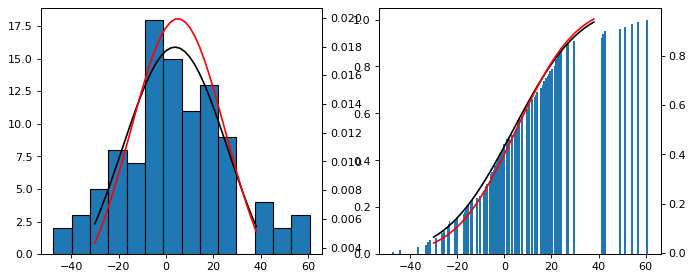

In [54]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
mu0,sigma0 = stats.norm.fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.norm.pdf(x=i, loc=mu0, scale=sigma0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec0 = []
for i in vec:
    pvec0.append(stats.norm.cdf(x=i, loc=mu0, scale=sigma0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.show()


In [55]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm')

KstestResult(statistic=0.49956524654091605, pvalue=1.3396420691082067e-23)

In [56]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm', args=(mu, sigma))

KstestResult(statistic=0.07001897016189174, pvalue=0.6843512703636954)

In [57]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos, 'norm', args=(mu0, sigma0))

KstestResult(statistic=0.058768305018577105, pvalue=0.8598546641491079)

In [58]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.norm.rvs(loc=mu0, scale= sigma0,size=1000)
stats.kstest(datos, datos2)

KstestResult(statistic=0.081, pvalue=0.5672914310740536)

#### Ejercicio1: 
Repita el ejercicio con:

(i) una muestra de datos simulados de una v.a. discreta de su elección

(ii) una muestra de datos simulados de una v.a. continua de su elección (distinta de la normal)

### Variable Discreta

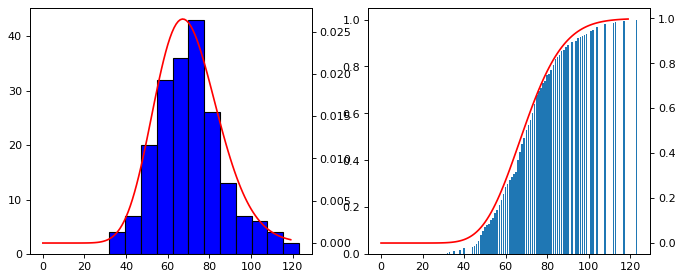

In [122]:
#Generación de datos a través de una distribución discreta
#simulación de v.a negativa binomial
p=0.3
n=30
size=200
datos_negbin =stats.nbinom.rvs(n=n, p=p, size=size) 
binwidth = 4

fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=80)

ax[0].hist(datos_negbin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
ax1 = ax[0].twinx()

largo = int(size*(3/5))
vec= list(range(largo))
#vec = list(range(n+1))

dvec = []
for i in vec:
    dvec.append(stats.nbinom.pmf(k=i, n=n, p=p))
ax1.plot(vec,dvec,color='red')

x,cum_bin = ecdf(datos_negbin)
ax[1].bar(x,cum_bin)
ax2 = ax[1].twinx()
##
pvec = []
for i in vec:
    pvec.append(stats.nbinom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec,color='red')
plt.show()

0.2981514609421586


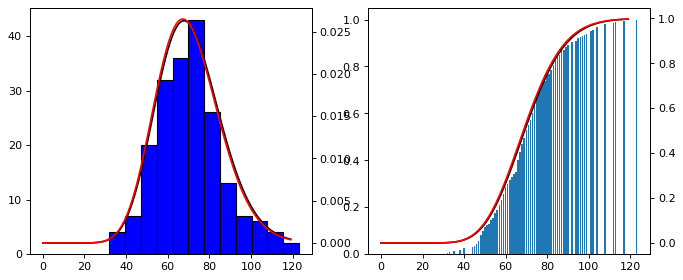

In [124]:
#Calculando los estimadores maximos verosímiles para distribución binomial

p0 = n / (n + (sum(datos_negbin)/len(datos_negbin)))
#p0 = sum(datos_negbin)/(n*len(datos_negbin))

print(p0)

binwidth = 4
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=80)
ax[0].hist(datos_negbin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))

ax1 = ax[0].twinx()
ax[1].bar(x,cum_bin)
ax2 = ax[1].twinx()

dvec0 = []
for i in vec:
    dvec0.append(stats.nbinom.pmf(k=i, n=n, p=p0))

pvec0 = []
for i in vec:
    pvec0.append(stats.nbinom.cdf(k=i, n=n, p=p0))

ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')    
    
ax2.plot(vec,pvec0,color='black')
ax2.plot(vec,pvec,color='red')
plt.show()

### Variable Continua

* Distribución Exponencial

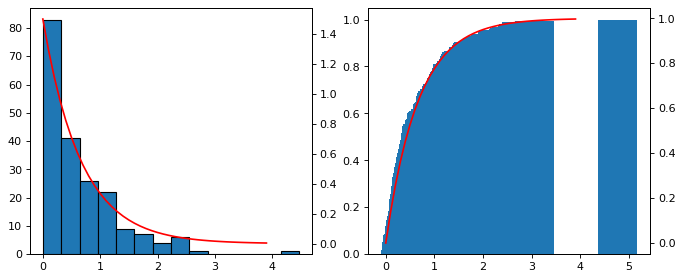

In [159]:
lamb = 1.5
size = 200
datos_exp = stats.expon.rvs(scale = 1/lamb, size=size)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos_exp, edgecolor = 'black', bins = int(70/5))
ax1 = axs[0].twinx()

vec = np.arange(0,4,0.1)
dvec = []
for i in vec:
    dvec.append(stats.expon.pdf(x=i, scale=1/lamb))
ax1.plot(vec,dvec,color='red')

x, cum_exp = ecdf(datos_exp)
axs[1].bar(x+0.3, cum_exp)
## probabilidad teórica
ax2 = axs[1].twinx()
##
pvec = []
for i in vec:
    pvec.append(stats.expon.cdf(x=i, scale=1/lamb))
ax2.plot(vec,pvec,color='red')
plt.show()

* Máximo Verosimilitud

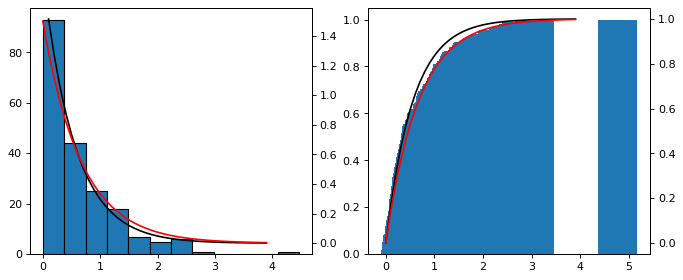

In [160]:
args = stats.expon.fit(datos_expon)
fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos_exp, edgecolor = 'black', bins = int(50/binwidth))
ax1 = axs[0].twinx()
dvec0 = []
for i in vec:
    dvec0.append(stats.expon.pdf(x=i, loc=args[0], scale=args[1]))
    
ax1.plot(vec[1:],dvec0[1:],color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x+0.3,cum_exp)
## probabilidad teórica
ax2 = axs[1].twinx()

pvec0 = []
for i in vec:
    pvec0.append(stats.expon.cdf(x=i, loc=args[0], scale=args[1]))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.show()




In [14]:
## Analizaremos que ocurre con datos reales
from datetime import datetime, timedelta
datos = pd.read_csv("grandesSismos.csv")
datos.head()

,Fecha_local,Fecha_local1,Hora_local,Latitud,Longitud,Magnitud_Ms
0,08-02-1570,08-02-1570,9:00,-36.8,-73.00,8.3
1,17-03-1575,17-03-1575,10:00,-33.4,-70.60,7.3
2,16-12-1575,16-12-1575,14:30,-39.8,-73.20,8.5
3,24-11-1604,24-11-1604,12:30,-18.5,-70.40,8.5
4,16-09-1615,16-09-1615,23:30,-18.5,-70.35,8.8


In [15]:
vec1 = datos['Fecha_local']
dtpo = []
ind = list(range(112))
for i in ind:
    fecha1 = datetime.strptime(vec1[i], '%d-%m-%Y')
    fecha2 = datetime.strptime(vec1[i+1], '%d-%m-%Y')
    num = fecha2-fecha1
    num = num/timedelta(days=1)
    dtpo.append(num)
    

In [19]:
figsize(9, 7)

# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(dtpo, color = 'blue', edgecolor = 'black')

# Agrega texto
plt.title('Histograma de los tiempos entre eventos')
plt.xlabel('Días'); plt.ylabel('Frecuencia de días');

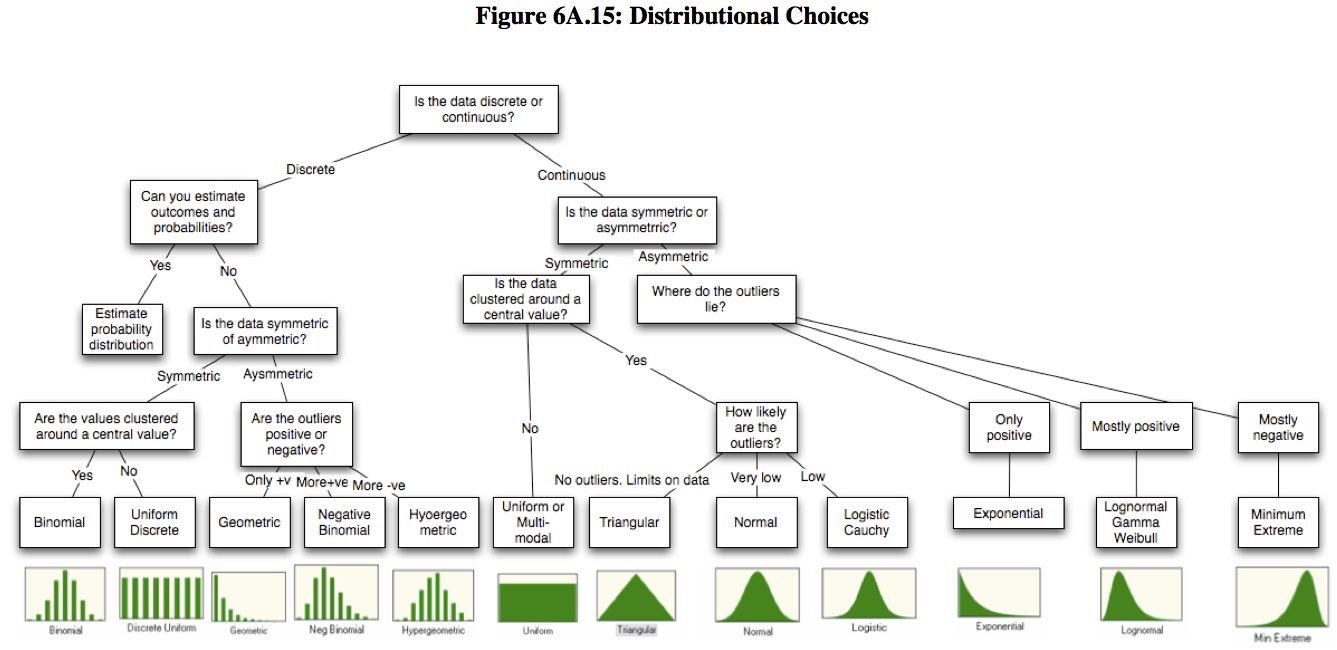

(0.0, 1457.3125)


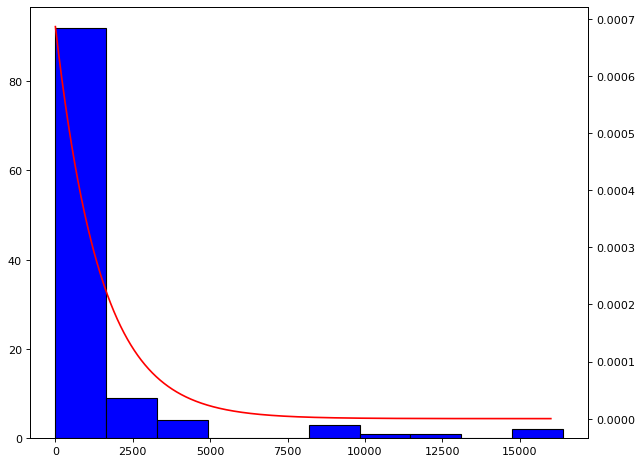

In [23]:
## ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpo, color = 'blue', edgecolor = 'black')
ax2 = ax.twinx()
args = stats.expon.fit(dtpo)
print(args)

vec = list(range(16000))

pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')

#plt.draw()
plt.show()

In [24]:
datos2 = stats.expon.rvs(*args,size=114)

stats.kstest(dtpo, datos2)

KstestResult(statistic=0.24968671679197996, pvalue=0.0012630498635585186)

#### Ejercicio 2:

(i) Interprete el resultado. ¿Qué otros modelos es razonable considerar? ¿Qué filtro en los datos podría mejorar el ajuste?

(ii) Desarrolle alguno de los análisis propuestos en (i). Comente sus resultados.

#### Ejercicio 3: 
Considere los datos analizados en la sesión anterior y estudie la posibilidad de ajustarles alguna distribución de probabilidad conocida, incluyendo estimación de parámetros por máxima verosimilitud y  el test de ajuste de k-s respectivo.